#LIBRARIES

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


#LOW CONTRAST IMAGE

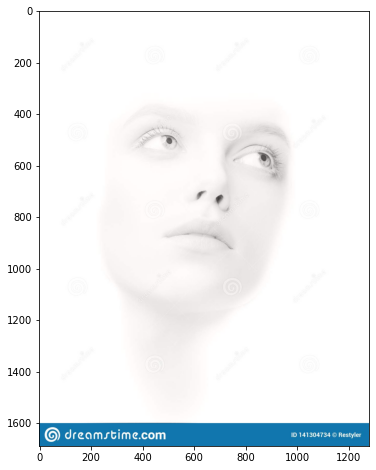

In [ ]:
image = cv2.imread('/content/low.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)

#GRAYSCALE IMAGE

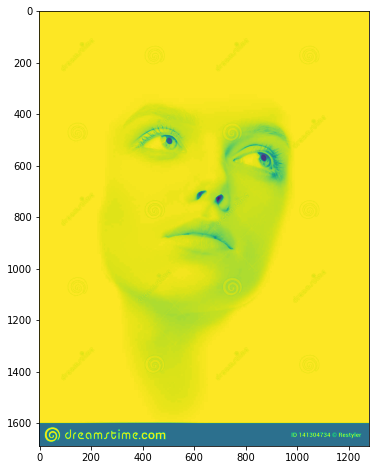

In [ ]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img_gray)

#HISTOGRAM OF LOW CONTRAST IMAGE

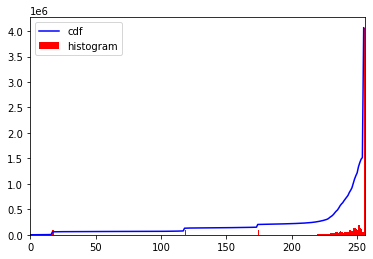

In [ ]:
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

As displayed in the histogram above, the majority of the pixel intensity ranges between 220 and 250, peaking around at 250. However, you can also see that the far left and right areas do not have any pixel intensity values. This reveals that our test image has poor contrast

To fix this, we will utilize OpenCV-Python’s .equalizeHist() method to spreads out the pixel intensity values. We will assign the resulting image as the variable ‘equ’.

For that, we need a transformation function which maps the input pixels in brighter region to output pixels in full region. That is what histogram equalization does.

Now we find the minimum histogram value (excluding 0) and apply the histogram equalization equation

#Histograms Equalization

In [ ]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [ ]:
img2 = cdf[image]

#HISTOGRAM OF Balanced  CONTRAST IMAGE

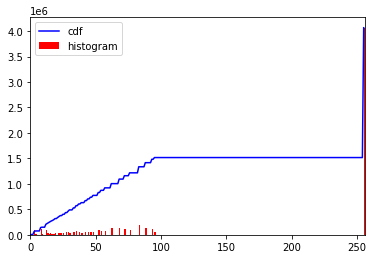

In [ ]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

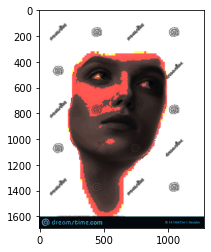

In [ ]:
plt.imshow(img2)

#Histograms Equalization in OpenCV

In [ ]:
img3 = cv2.imread('/content/low.jpg',0)
equ = cv2.equalizeHist(img3)
res = np.hstack((img3,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

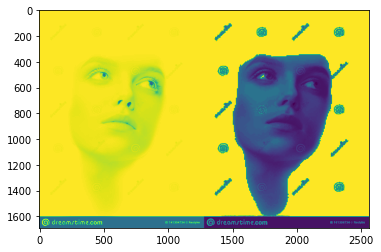

In [ ]:
plt.imshow(img3)
plt.imshow(res)